# Visualization Notebook
This file can be used to plot your graph and to try out your solve function. It is not part of the grading.

First we import necessary packages and then define our plotting function

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import json
from networkx.readwrite import json_graph
from agv import solve


def plot_graph(G: nx.Graph, plot_weights: bool, pos_given: bool):
    """Plots the graph

    Args:
        G (nx.DiGraph): Graph to plot
        plot_weights (bool): Set to true if you want to plot the weights of the edges/arcs
        pos_given (bool): Set to true if the graph has a pos attribute
    """
    if pos_given:
        pos = nx.get_node_attributes(G, "pos")
    else:
        pos = nx.shell_layout(G)
    node_labels = {n: n for n in G.nodes}
    if plot_weights:
        edge_labels = dict(
            [((u, v), f'{G.edges[(u, v)]["weight"]}') for u, v in G.edges]
        )
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw(G, with_labels=True, labels=node_labels, pos=pos)
    plt.show()

Lets start by plotting the original street layout

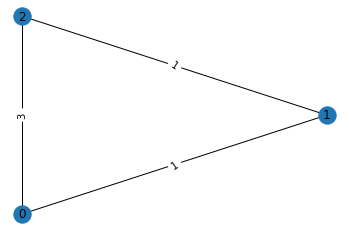

[(0, {'pos': [0, 0]}), (2, {'pos': [0, 1]}), (1, {'pos': [0.5, 0.5]})]
[(0, 1, {'weight': 1}), (0, 2, {'weight': 3}), (2, 1, {'weight': 1})]


In [2]:
# Instance to solve
full_instance_path = "data_4.json"

with open(full_instance_path) as f:
    data = json.load(f)
    g_street = json_graph.node_link_graph(data["graph"])

plot_graph(g_street, True, True)

# list all properties of nodes
print(g_street.nodes(data=True))
# list all properties of edges
print(g_street.edges(data=True))

Now we solve the instance and retrieve the time-expanded graph

In [3]:
model, g_time_expanded = solve(full_instance_path)

Academic license - for non-commercial use only - expires 2024-04-06
Using license file /home/tilmohr/gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 16 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 44 rows, 58 columns and 160 nonzeros
Model fingerprint: 0x92143c21
Variable types: 0 continuous, 58 integer (58 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 4.0000000
Presolve removed 44 rows and 58 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds
Thread count was 1 (of 16 available processors)

Solution count 1: 4 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.000000000000e+00, best bound 4.000000000000e+00, gap 0.0000%


Let's plot your time expanded graph - set the first flag to true if you added weights to your arcs and the second flag to true if you added positions to your nodes (recommended!). For example, you may use the time steps as y coordinates and the location IDs as x coordinates.

**NOTE:** This is just an example for your convenience, you do not need to add positions to your nodes or plot your graph for your submission.

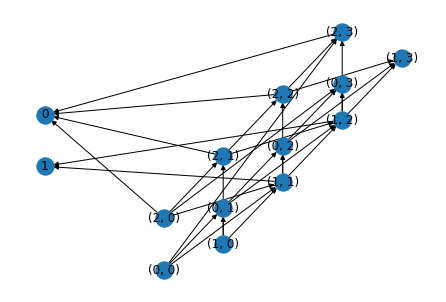

[((0, 0), {'pos': (0.0, 0.0)}), ((2, 0), {'pos': (0.0, 1.0)}), ((1, 0), {'pos': (0.5, 0.5)}), ((0, 1), {'pos': (0.5, 1.2)}), ((2, 1), {'pos': (0.5, 2.2)}), ((1, 1), {'pos': (1.0, 1.7)}), ((0, 2), {'pos': (1.0, 2.4)}), ((2, 2), {'pos': (1.0, 3.4)}), ((1, 2), {'pos': (1.5, 2.9)}), ((0, 3), {'pos': (1.5, 3.5999999999999996)}), ((2, 3), {'pos': (1.5, 4.6)}), ((1, 3), {'pos': (2.0, 4.1)}), ('1', {'pos': (-1, 2)}), ('0', {'pos': (-1, 3)})]
[((0, 0), (1, 1), {'weight': 1}), ((0, 0), (2, 3), {'weight': 3}), ((0, 0), (0, 1), {'weight': 1}), ((2, 0), (0, 3), {'weight': 3}), ((2, 0), (1, 1), {'weight': 1}), ((2, 0), (2, 1), {'weight': 1}), ((2, 0), '0', {'weight': 0}), ((1, 0), (0, 1), {'weight': 1}), ((1, 0), (2, 1), {'weight': 1}), ((1, 0), (1, 1), {'weight': 1}), ((0, 1), (1, 2), {'weight': 1}), ((0, 1), (0, 2), {'weight': 1}), ((2, 1), (1, 2), {'weight': 1}), ((2, 1), (2, 2), {'weight': 1}), ((2, 1), '0', {'weight': 0}), ((1, 1), (0, 2), {'weight': 1}), ((1, 1), (2, 2), {'weight': 1}), ((1, 1

In [4]:
plot_graph(G=g_time_expanded, plot_weights=False, pos_given=True)

# list all properties of nodes
print(g_time_expanded.nodes(data=True))
# list all properties of edges
print(g_time_expanded.edges(data=True))

In [5]:
# data_1.json
solve("data_1.json")

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 16 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 51 rows, 75 columns and 192 nonzeros
Model fingerprint: 0x235e1058
Variable types: 0 continuous, 75 integer (75 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 6.0000000
Presolve removed 51 rows and 75 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds
Thread count was 1 (of 16 available processors)

Solution count 2: 5 6 

Optimal solution found (tolerance 1.00e-04)
Best objective 5.000000000000e+00, best bound 5.000000000000e+00, gap 0.0000%


(<gurobi.Model MIP instance AGV: 51 constrs, 75 vars, No parameter changes>,
 <networkx.classes.digraph.DiGraph at 0x7fbaceabc6a0>)

In [6]:
# data_2.json
solve("data_2.json")

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 16 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 15401 rows, 64500 columns and 248745 nonzeros
Model fingerprint: 0x60e77429
Variable types: 0 continuous, 64500 integer (64500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 5e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 12214 rows and 56845 columns
Presolve time: 0.18s
Presolved: 3187 rows, 7655 columns, 32562 nonzeros
Variable types: 0 continuous, 7655 integer (7655 binary)

Root relaxation: objective 1.716667e+02, 748 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  171.66667    0   58          -  171.66667      -     -    0s
H    0     0                     172.0000000  171.66667  0.19%     -    0s

(<gurobi.Model MIP instance AGV: 15401 constrs, 64500 vars, No parameter changes>,
 <networkx.classes.digraph.DiGraph at 0x7fbaceabc6d8>)

In [7]:
# data_3.json
solve("data_3.json")

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 16 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 202232 rows, 1114700 columns and 4068589 nonzeros
Model fingerprint: 0x483d1778
Variable types: 0 continuous, 1114700 integer (1114700 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 5e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 146967 rows and 916882 columns
Presolve time: 4.14s
Presolved: 55265 rows, 197818 columns, 859550 nonzeros
Variable types: 0 continuous, 197818 integer (197818 binary)

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...


Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
    1849    1.9685000e+03   6.640000e+02   5.597002e+11      5s
Concurrent spin time: 0.00s

Solved with dual simplex

Root relaxation: objective 8.469583e+02, 11605 iterations,

(<gurobi.Model MIP instance AGV: 202232 constrs, 1114700 vars, No parameter changes>,
 <networkx.classes.digraph.DiGraph at 0x7fbac02f2550>)